In [36]:
"""
chapter 11
"""

# import libs 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm  # color map 
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.datasets import make_blobs, make_moons 
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


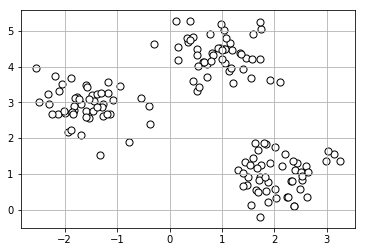

In [4]:
# import dataset 
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3,
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

# plot the data 
plt.scatter(X[:,0],
            X[:,1], 
            color='white', 
            edgecolor='black',
            marker='o', 
            s=50)

plt.grid()
plt.show()


In [7]:
# -------------------- k means ---------------------- 

km = KMeans(n_clusters=3, # the number of desired clusters 
            init='random', 
            n_init=10, # run 10 times independently with different random centroids to choose the final model as the one with the lowest SSE
            max_iter=300,  #  maximum number of iterations for each single run 
            tol=1e-04, #  stops early if it converges before the maximum number of iterations is reached
            random_state=0)

y_km = km.fit_predict(X)



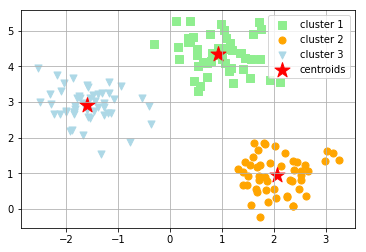

In [8]:
# plot results 

plt.scatter(X[y_km==0,0], 
            X[y_km ==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km ==1,0], 
            X[y_km ==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')
plt.scatter(X[y_km ==2,0], 
            X[y_km ==2,1], 
            s=50, 
            c='lightblue', 
            marker='v', 
            label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')

plt.legend()
plt.grid()
plt.show()

Distortion: 72.48


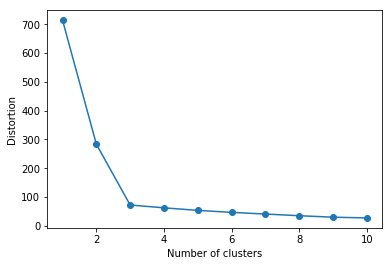

In [10]:
# -------------- elbow method --------------------
# find the optimal number of clusters 

# within-cluster SSE
print('Distortion: %.2f' % km.inertia_)

# elbow method 
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# elbow is locted at k = 3 --> k = 3 is a good choice for this data set 

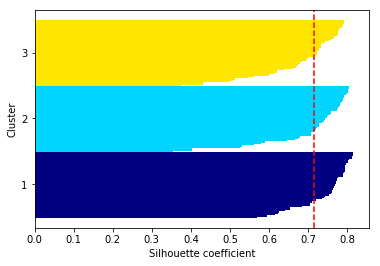

In [14]:
# ------------- silhouette plot ---------------------- 

# silhouette plot 1
km = KMeans(n_clusters=3, 
            init='k-means++',  # k-means++: place the initial centroids far away from each other 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)


cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
             edgecolor='none', 
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

# silhouette plot for a relatively good clustering: 
# coefficients are not even close to 0, 
# which can be an indicator of a good clustering
# dotted line --> the average silhouette coefficient to the plot

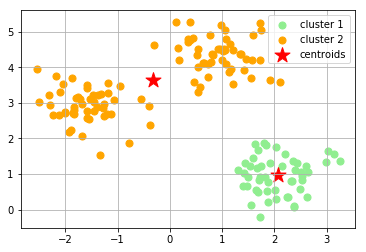

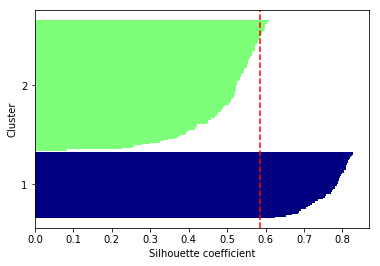

In [15]:
# silhouette plot 2

# seed the k-means algorithm with two centroids only
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, c='lightgreen', 
            label='cluster 1')

plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')

plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')

plt.legend()
plt.grid()
plt.show()

# create the silhouette plot to evaluate the results
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
             edgecolor='none', 
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

# the silhouettes now have visibly different lengths and width
# which yields further evidence for a suboptimal clustering

In [18]:
# -------------- agglomerative clustering (complete linkage) ------------

#  generate random sample data 
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [20]:
# compute the distance matrix 
# calculated the Euclidean distance between each pair 
# of sample points in the dataset based on the features X, Y, and Z

row_dist = pd.DataFrame(squareform(
           pdist(df, metric='euclidean')), 
           columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [22]:
# compute the linkage matrix 

# method 1
# row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

# method 2
row_clusters = linkage(df.values, method='complete', metric='euclidean')

# clustering results 
pd.DataFrame(row_clusters, 
     columns=['row label 1', 
              'row label 2', 
              'distance', 
              'no. of items in clust.'],
     index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


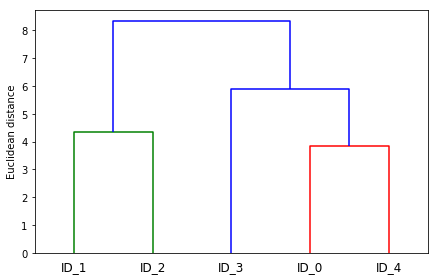

In [24]:
# visualize the results in the form of a dendrogram
row_dendr = dendrogram(row_clusters, 
                      labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

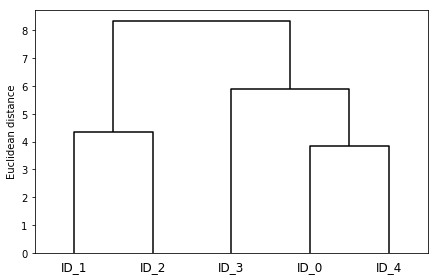

In [27]:
# make dendrogram black 
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters, 
                      labels=labels,                      
                      color_threshold=np.inf)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

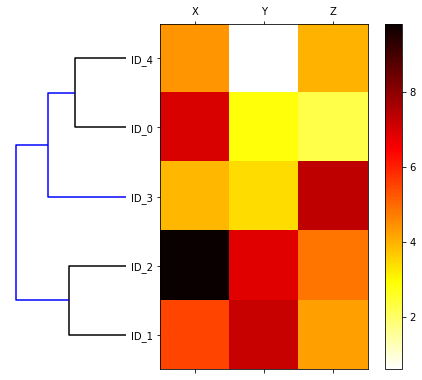

In [30]:
# attach dendrograms to heap map  
# represent the individual values in the sample matrix with a color code.

# 1. create a new figure object and define the x axis position, y axis 
# position, width, and height of the dendrogram via the add_axes attribute. 
# Furthermore, rotate the dendrogram 90 degrees counter-clockwise.  
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')


# 2. reorder the data in the initial DataFrame according to the clustering 
# labels that can be accessed from the dendrogram object, which is essentially a 
# Python dictionary, via the leaves key. 
df_rowclust = df.ix[row_dendr['leaves'][::-1]]


# 3. construct the heat map from the reordered DataFrame and position 
# it right next to the dendrogram:
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

# 4. modify the aesthetics of the heat map by removing the axis 
# ticks and hiding the axis spines. Also, we will add a color bar and assign  
# the feature and sample names to the x and y axis tick labels, respectively.  
axd.set_xticks([])
axd.set_yticks([])

for i in axd.spines.values():
    i.set_visible(False)
    
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [32]:
# agglomerative clustering via scikit-learn
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


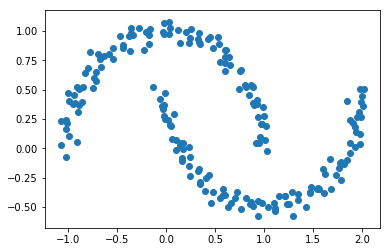

In [34]:
# ---------------------- DBSCAN ------------------- 

# create a new dataset of half-moon-shaped structures
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

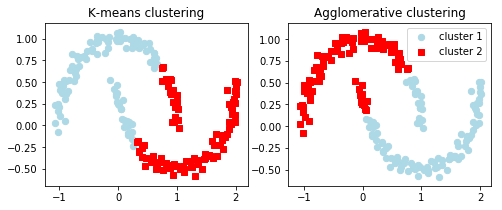

In [35]:
# compare with k-means & agglomerative 

# k-means
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            c='lightblue', 
            marker='o', 
            s=40, 
            label='cluster 1')
ax1.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            c='red', 
            marker='s', 
            s=40, 
            label='cluster 2')
ax1.set_title('K-means clustering')


# agglomerative 
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac==0,0], 
            X[y_ac==0,1], 
            c='lightblue', 
            marker='o', 
            s=40, 
            label='cluster 1')
ax2.scatter(X[y_ac==1,0], 
            X[y_ac==1,1], 
            c='red', 
            marker='s', 
            s=40, 
            label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

# k-means algorithm is unable to separate the two clusters
# the hierarchical clustering algorithm was challenged by those complex shapes

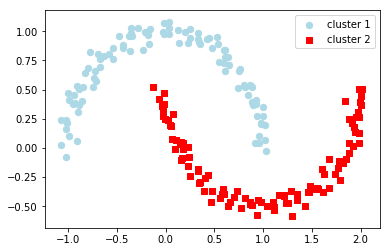

In [37]:
# DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)


plt.scatter(X[y_db==0,0], 
            X[y_db==0,1], 
            c='lightblue', 
            marker='o', 
            s=40, 
            label='cluster 1')
plt.scatter(X[y_db==1,0], 
            X[y_db==1,1], 
            c='red', 
            marker='s', 
            s=40, 
            label='cluster 2')
plt.legend()
plt.show()

# DBSCAN algorithm can successfully detect the half-moon shapes, which 
# highlights one of the strengths of DBSCAN (clustering data of arbitrary shapes)